## Test out how to edit on 2_Spurious_MNIST dataset

In [1]:
# General imports
import torch
import numpy as np
import os, sys
import json
from tqdm import tqdm
from datetime import datetime
import pandas as pd
import shutil

In [2]:
# Local imports
sys.path.insert(0, 'src')
from utils import read_json, read_lists, informal_log, list_to_dict, write_lists, write_json, save_image
from utils.visualizations import show_image_rows, make_grid
from utils.model_utils import prepare_device
from parse_config import ConfigParser
# from data_loader import data_loaders
import datasets.datasets as module_data
import datasets.edit_datasets as module_edit_data
import model.model as module_arch
from utils.knn_utils import load_and_analyze_knn
from utils.results_to_csv import store_csv
from edit_MNIST import edit, run_trials

In [3]:
# Define constants, paths
dataset_type = '2_Spurious_MNIST'
model_type = 'LeNet'
config_path = os.path.join('configs', 'MNIST', '{}_{}_edit.json'.format(dataset_type, model_type))
config_dict = read_json(config_path)
class_list = [i for i in range(10)]

analyze_in_edit = True

In [4]:
# Load config file
config = ConfigParser(config_dict)
print("Save dir: {}".format(config.save_dir))

# Set K
K = config_dict['editor']['K']

device, device_ids = prepare_device(config_dict['n_gpu'])

Save dir: saved/edit_2_Spurious_MNIST/method_eac/debug/LeNet/0323_110318/models


In [5]:
# Load datasets
data_loader_args = dict(config_dict["data_loader"]["args"])

# Create validation data loader
test_dataset =config.init_obj('test_dataset', module_data)

test_data_loader = torch.utils.data.DataLoader(
    test_dataset,
    **data_loader_args
)

# Create data loader for covariance matrix
covariance_dataset = config.init_obj('covariance_dataset', module_data)
covariance_data_loader = torch.utils.data.DataLoader(
    covariance_dataset,
    **data_loader_args
)


### Create log and save paths

In [6]:
# create log path to store the paths to each trial
save_root = config_dict['trainer']['save_dir']
timestamp = os.path.basename(os.path.dirname(config.save_dir))
save_dir = os.path.join(save_root, config_dict['name'], timestamp)
trial_paths_path = os.path.join(save_dir, 'trial_paths.txt')
progress_report_path = os.path.join(save_dir, 'progress_report.txt')
if os.path.exists(trial_paths_path):
    print("Path {} already exists. Aborting.".format(trial_paths_path))
else:
    # progress_report_path = os.path.join(save_root, config_dict['name'], timestamp, 'progress_report.txt')
    if os.path.exists(progress_report_path):
        os.remove(progress_report_path)
    print("Saving path to directories for each trial to {}".format(trial_paths_path))
    print("Printing progress reports to {}".format(progress_report_path))

Saving path to directories for each trial to saved/edit_2_Spurious_MNIST/method_eac/debug/LeNet/0323_110318/trial_paths.txt
Printing progress reports to saved/edit_2_Spurious_MNIST/method_eac/debug/LeNet/0323_110318/progress_report.txt


### Create dataset and save edit_idxs file

In [7]:

MNIST_edit_dataset = config.init_obj('edit_dataset', module_edit_data)
edit_data_loader = torch.utils.data.DataLoader(
    MNIST_edit_dataset,
    shuffle=False,
    batch_size=1,
    num_workers=8
)
# Save edit_idxs
# edit_idxs_src_path = MNIST_edit_dataset.edit_idxs_path
# edit_idxs_dst_path = os.path.join(save_dir, os.path.basename(edit_idxs_src_path))
# shutil.copyfile(edit_idxs_src_path, edit_idxs_dst_path)
# print("Saved edit_idxs file to {}".format(edit_idxs_dst_path))]


### Run Trials


(0323_110318) Starting Trial 1/3...
saved/edit_2_Spurious_MNIST/method_eac/debug/LeNet/0323_110318/results/edit_idx_0
torch.Size([1, 1, 32, 32])
3 1
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


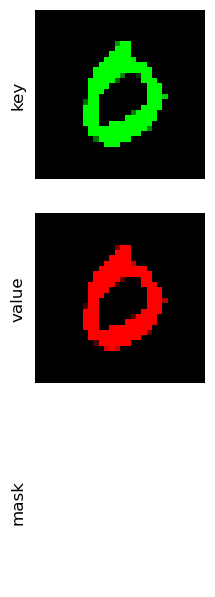

Seed: 0
Editing layer 1
Created ModelWrapperSanturkar model with 31340 trainable parameters
Restored weights from saved/train/2_Spurious_MNIST-LeNet/0323_100223/models/model_best.pth
Using passed in data loader for validation.
Performing pre-edit metric calculations on validation set.


100%|███████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 19.44it/s]

Pre-edit metrics: {'TP': array([450, 538, 520, 497, 452, 422, 436, 472, 456, 453]), 'TN': array([8250, 8296, 8225, 7702, 7784, 8342, 8397, 8265, 7467, 7968]), 'FPs': array([ 320,  119,  293,  838,  784,  316,  195,  257, 1109,  573]), 'FNs': array([480, 547, 462, 463, 480, 420, 472, 506, 468, 506]), 'accuracy': 0.4943157894736842, 'per_class_accuracy': array([0.91578947, 0.92989474, 0.92052632, 0.86305263, 0.86694737,
       0.92252632, 0.92978947, 0.91968421, 0.834     , 0.88642105]), 'per_class_accuracy_mean': 0.8988631578947368, 'precision': array([0.58441558, 0.81887367, 0.6396064 , 0.37228464, 0.36569579,
       0.57181572, 0.69096672, 0.64746228, 0.2913738 , 0.44152047]), 'precision_mean': 0.5424015070238444, 'recall': array([0.48387097, 0.49585253, 0.52953157, 0.51770833, 0.48497854,
       0.50118765, 0.48017621, 0.48261759, 0.49350649, 0.47236705]), 'recall_mean': 0.4941796933975864, 'predicted_class_distribution': array([ 770,  657,  813, 1335, 1236,  738,  631,  729, 1565, 1

Found precomputed cov matrices, returning...
n_edit: 1
Forwarded edit data thru model
Kstar[0] type: <class 'torch.Tensor'> shape: torch.Size([10, 14, 14])
vstar type: <class 'torch.Tensor'> shape: torch.Size([1, 20, 5, 5])
mstar type: <class 'torch.Tensor'> shape: torch.Size([1, 1, 32, 32])
key shape: torch.Size([1, 10, 14, 14]) val shape: torch.Size([1, 20, 5, 5])


tensor(0.4715, device='cuda:0', grad_fn=<DivBackward0>): 100%|█| 40000/40000 [00:52<00:00, 755.6


Loss (orig, final): 3.3491387367248535 0.4715160131454468
L2 norm of weight change: 13.162087440490723
Performing post-edit metric calculations on validation set.


100%|███████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 38.87it/s]

Post-edit metrics: {'TP': array([ 924, 1080,  928,  934,  913,   71,    0,    3,    0,    0]), 'TN': array([8017, 8066, 7754, 7433, 6695, 8658, 8591, 8522, 8576, 8541]), 'FPs': array([ 553,  349,  764, 1107, 1873,    0,    1,    0,    0,    0]), 'FNs': array([  6,   5,  54,  26,  19, 771, 908, 975, 924, 959]), 'accuracy': 0.5108421052631579, 'per_class_accuracy': array([0.94115789, 0.96273684, 0.91389474, 0.88073684, 0.80084211,
       0.91884211, 0.90431579, 0.89736842, 0.90273684, 0.89905263]), 'per_class_accuracy_mean': 0.9021684210526315, 'precision': array([0.62559242, 0.75577327, 0.54846336, 0.45761881, 0.32770998,
       1.        , 0.        , 1.        , 0.        , 0.        ]), 'precision_mean': 0.47151578348256606, 'recall': array([0.99354839, 0.99539171, 0.94501018, 0.97291667, 0.97961373,
       0.08432304, 0.        , 0.00306748, 0.        , 0.        ]), 'recall_mean': 0.4973871201080158, 'predicted_class_distribution': array([1477, 1429, 1692, 2041, 2786,   71,    1,  


/n/fs/ac-editing/model-editing/src/model/metric.py:168: RuntimeWarning: invalid value encountered in divide
  return np.nan_to_num(TPs / (TPs + FPs))
/n/fs/ac-editing/model-editing/src/model/metric.py:205: RuntimeWarning: invalid value encountered in divide
  return np.nan_to_num(2 * precisions * recalls / (precisions + recalls))


saved/edit_2_Spurious_MNIST/method_eac/debug/LeNet/0323_110318/results/edit_idx_1
torch.Size([2, 1, 32, 32])
3 2
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


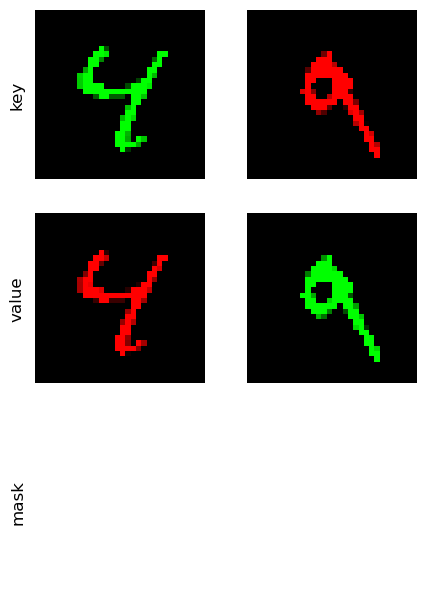

Seed: 0
Editing layer 1
Created ModelWrapperSanturkar model with 31340 trainable parameters
Restored weights from saved/train/2_Spurious_MNIST-LeNet/0323_100223/models/model_best.pth
Using passed in data loader for validation.
Performing pre-edit metric calculations on validation set.


100%|███████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 40.36it/s]

Pre-edit metrics: {'TP': array([450, 538, 520, 497, 452, 422, 436, 472, 456, 453]), 'TN': array([8250, 8296, 8225, 7702, 7784, 8342, 8397, 8265, 7467, 7968]), 'FPs': array([ 320,  119,  293,  838,  784,  316,  195,  257, 1109,  573]), 'FNs': array([480, 547, 462, 463, 480, 420, 472, 506, 468, 506]), 'accuracy': 0.4943157894736842, 'per_class_accuracy': array([0.91578947, 0.92989474, 0.92052632, 0.86305263, 0.86694737,
       0.92252632, 0.92978947, 0.91968421, 0.834     , 0.88642105]), 'per_class_accuracy_mean': 0.8988631578947368, 'precision': array([0.58441558, 0.81887367, 0.6396064 , 0.37228464, 0.36569579,
       0.57181572, 0.69096672, 0.64746228, 0.2913738 , 0.44152047]), 'precision_mean': 0.5424015070238444, 'recall': array([0.48387097, 0.49585253, 0.52953157, 0.51770833, 0.48497854,
       0.50118765, 0.48017621, 0.48261759, 0.49350649, 0.47236705]), 'recall_mean': 0.4941796933975864, 'predicted_class_distribution': array([ 770,  657,  813, 1335, 1236,  738,  631,  729, 1565, 1

Saved pre-edit logits to saved/edit_2_Spurious_MNIST/method_eac/debug/LeNet/0323_110318/results/edit_idx_1/models/pre_edit_logits.pth
Created <class 'trainer.editor.EditorEAC'> editor.
Is covariance_dataset in config? True
Created dataloader for covariance matrix from 2_Spurious_MNIST_hold_out
Looking for covariance matrix weights in cache/2_Spurious_MNIST_hold_out/lenet-1
Found precomputed cov matrices, returning...
n_edit: 2
Forwarded edit data thru model
Kstar[0] type: <class 'torch.Tensor'> shape: torch.Size([10, 14, 14])
vstar type: <class 'torch.Tensor'> shape: torch.Size([2, 20, 5, 5])
mstar type: <class 'torch.Tensor'> shape: torch.Size([2, 1, 32, 32])
key shape: torch.Size([2, 10, 14, 14]) val shape: torch.Size([2, 20, 5, 5])


tensor(0.6572, device='cuda:0', grad_fn=<DivBackward0>): 100%|█| 40000/40000 [00:52<00:00, 761.7

Loss (orig, final): 1.130075216293335 0.6572200059890747
L2 norm of weight change: 15.626611709594727
Performing post-edit metric calculations on validation set.



100%|███████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 39.39it/s]

Post-edit metrics: {'TP': array([455, 656, 636, 501, 469, 429, 424, 494, 268, 307]), 'TN': array([8213, 8239, 8187, 7795, 7784, 7954, 8336, 8027, 8005, 8099]), 'FPs': array([357, 176, 331, 745, 784, 704, 256, 495, 571, 442]), 'FNs': array([475, 429, 346, 459, 463, 413, 484, 484, 656, 652]), 'accuracy': 0.4883157894736842, 'per_class_accuracy': array([0.91242105, 0.93631579, 0.92873684, 0.87326316, 0.86873684,
       0.88242105, 0.92210526, 0.89694737, 0.87084211, 0.88484211]), 'per_class_accuracy_mean': 0.8976631578947367, 'precision': array([0.56034483, 0.78846154, 0.65770424, 0.40208668, 0.37430168,
       0.37864078, 0.62352941, 0.49949444, 0.31942789, 0.40987984]), 'precision_mean': 0.501387131673311, 'recall': array([0.48924731, 0.60460829, 0.64765784, 0.521875  , 0.50321888,
       0.50950119, 0.46696035, 0.50511247, 0.29004329, 0.32012513]), 'recall_mean': 0.4858349766915924, 'predicted_class_distribution': array([ 812,  832,  967, 1246, 1253, 1133,  680,  989,  839,  749]), 'f1

saved/edit_2_Spurious_MNIST/method_eac/debug/LeNet/0323_110318/results/edit_idx_2
torch.Size([3, 1, 32, 32])
3 3
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


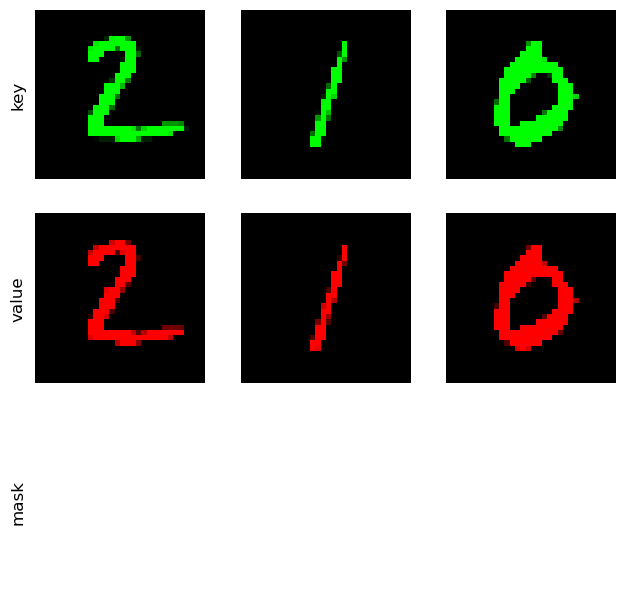

Seed: 0
Editing layer 1
Created ModelWrapperSanturkar model with 31340 trainable parameters
Restored weights from saved/train/2_Spurious_MNIST-LeNet/0323_100223/models/model_best.pth
Using passed in data loader for validation.
Performing pre-edit metric calculations on validation set.


100%|███████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 40.60it/s]

Pre-edit metrics: {'TP': array([450, 538, 520, 497, 452, 422, 436, 472, 456, 453]), 'TN': array([8250, 8296, 8225, 7702, 7784, 8342, 8397, 8265, 7467, 7968]), 'FPs': array([ 320,  119,  293,  838,  784,  316,  195,  257, 1109,  573]), 'FNs': array([480, 547, 462, 463, 480, 420, 472, 506, 468, 506]), 'accuracy': 0.4943157894736842, 'per_class_accuracy': array([0.91578947, 0.92989474, 0.92052632, 0.86305263, 0.86694737,
       0.92252632, 0.92978947, 0.91968421, 0.834     , 0.88642105]), 'per_class_accuracy_mean': 0.8988631578947368, 'precision': array([0.58441558, 0.81887367, 0.6396064 , 0.37228464, 0.36569579,
       0.57181572, 0.69096672, 0.64746228, 0.2913738 , 0.44152047]), 'precision_mean': 0.5424015070238444, 'recall': array([0.48387097, 0.49585253, 0.52953157, 0.51770833, 0.48497854,
       0.50118765, 0.48017621, 0.48261759, 0.49350649, 0.47236705]), 'recall_mean': 0.4941796933975864, 'predicted_class_distribution': array([ 770,  657,  813, 1335, 1236,  738,  631,  729, 1565, 1

Found precomputed cov matrices, returning...
n_edit: 3
Forwarded edit data thru model
Kstar[0] type: <class 'torch.Tensor'> shape: torch.Size([10, 14, 14])
vstar type: <class 'torch.Tensor'> shape: torch.Size([3, 20, 5, 5])
mstar type: <class 'torch.Tensor'> shape: torch.Size([3, 1, 32, 32])
key shape: torch.Size([3, 10, 14, 14]) val shape: torch.Size([3, 20, 5, 5])


tensor(0.2166, device='cuda:0', grad_fn=<DivBackward0>): 100%|█| 40000/40000 [00:52<00:00, 762.8


Loss (orig, final): 0.8320460319519043 0.21663473546504974
L2 norm of weight change: 13.455233573913574
Performing post-edit metric calculations on validation set.


100%|███████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 40.26it/s]

Post-edit metrics: {'TP': array([ 926, 1082,  937,  910,  912,  115,    0,   12,    0,    0]), 'TN': array([8038, 8047, 7806, 7391, 6733, 8653, 8592, 8519, 8575, 8540]), 'FPs': array([ 532,  368,  712, 1149, 1835,    5,    0,    3,    1,    1]), 'FNs': array([  4,   3,  45,  50,  20, 727, 908, 966, 924, 959]), 'accuracy': 0.5151578947368421, 'per_class_accuracy': array([0.94357895, 0.96094737, 0.92031579, 0.87378947, 0.80473684,
       0.92294737, 0.90442105, 0.898     , 0.90263158, 0.89894737]), 'per_class_accuracy_mean': 0.9030315789473684, 'precision': array([0.6351166 , 0.7462069 , 0.56822317, 0.44196212, 0.33199854,
       0.95833333, 0.        , 0.8       , 0.        , 0.        ]), 'precision_mean': 0.4481840654918319, 'recall': array([0.99569892, 0.99723502, 0.95417515, 0.94791667, 0.97854077,
       0.13657957, 0.        , 0.01226994, 0.        , 0.        ]), 'recall_mean': 0.5022416050817867, 'predicted_class_distribution': array([1458, 1450, 1649, 2059, 2747,  120,    0,   


/n/fs/ac-editing/model-editing/src/model/metric.py:168: RuntimeWarning: invalid value encountered in divide
  return np.nan_to_num(TPs / (TPs + FPs))
/n/fs/ac-editing/model-editing/src/model/metric.py:205: RuntimeWarning: invalid value encountered in divide
  return np.nan_to_num(2 * precisions * recalls / (precisions + recalls))


Saved post-edit logits to saved/edit_2_Spurious_MNIST/method_eac/debug/LeNet/0323_110318/results/edit_idx_2/models/post_edit_logits.pth
All metrics and KNN results can be found in saved/edit_2_Spurious_MNIST/method_eac/debug/LeNet/0323_110318/results/edit_idx_2/models


In [8]:
run_trials(
    edit_data_loader=edit_data_loader,
    progress_report_path=progress_report_path,
    trial_paths_path=trial_paths_path,
    test_data_loader=test_data_loader,
    # covariance_data_loader=covariance_data_loader,
    config_dict=config_dict,
    run_id_prefix=os.path.join(timestamp),
    debug=True,
    seed=0)


### Run experiments varying some variable

In [45]:
def get_nested_dict_value(keys: list,
                          dictionary: dict):
    
    # Base case
    if len(keys) == 1:
        try:
            return dictionary[keys[0]]
        except:
            print("in except")
            return None
    else:
        try:
            item = dictionary[keys[0]]
            return get_nested_dict_value(
                keys=keys[1:],
                dictionary=item)
        except:
            print("in except")
            return None
        
def set_nested_dict_value(keys: list,
                          dictionary: dict,
                          value: any):
    '''
    DOES change the original dictionary
    '''
    
    # Base case
    if len(keys) == 1:
        dictionary[keys[0]] = value
        return True
    else:
        try:
            item = dictionary[keys[0]]
            if not isinstance(item, dict):
                return False
            else:
                return set_nested_dict_value(
                    keys=keys[1:],
                    dictionary=item,
                    value=value)
        except:
            print("in except")
            return False

def run_experiments(iv_path: str,
                    iv_values: list,
                    edit_data_loader: list,
                    progress_report_path: str,
                    trial_paths_path: str,
                    timestamp: str,
                    config_dict: dict,
                    test_data_loader=None,
                    covariance_data_loader=None,
                    analyze_in_edit=True,
                    debug=True,
                    seed: int=0):
    
    # TODO: this may need to be modified if IV is a nested key
    iv_path_list = iv_path.split('/')
    
    if get_nested_dict_value(keys=iv_path_list, dictionary=config_dict) is None:
        raise ValueError("Could not find path of keys {} in config dictionary".format(iv_path))

    n_experiments = len(iv_values)
    for iv_idx, iv_value in enumerate(iv_values):
        # config_dict[iv_name] = iv_value
        if not set_nested_dict_value(
            keys=iv_path_list,
            dictionary=config_dict,
            value=iv_value):
            raise ValueError("Unable to set value of {} to {}".format(iv_path, iv_value))
        informal_log("Experimenting with {} of {}".format(iv_path, iv_value), progress_report_path)
        
        run_id_prefix = os.path.join(timestamp, '{}_{}'.format(iv_path.replace('/', '_'), iv_value))
        # run_trials(
        #     EAC_edit_data=EAC_edit_data,
        #     progress_report_path=progress_report_path,
        #     trial_paths_path=trial_paths_path,
        #     config_dict=config_dict,
        #     run_id_prefix=run_id_prefix,
        #     debug=debug)
        
        run_trials(
            edit_data_loader=edit_data_loader,
            test_data_loader=test_data_loader,
            covariance_data_loader=covariance_data_loader,
            config_dict=config_dict,
            run_id_prefix=run_id_prefix,
            progress_report_path=progress_report_path,
            trial_paths_path=trial_paths_path,
            debug=debug,
            analyze_in_edit=analyze_in_edit,
            seed=seed)
            

#### Run experiments varying layer number

Varying layernum with following values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Experimenting with layernum of 1
(0321_144302) Starting Trial 1/3...
saved/edit_2_Spurious_MNIST/method_eac/debug/VGG_16-layernum/0321_142034/layernum_1/results/edit_idx_0
torch.Size([1, 1, 32, 32])
3 1


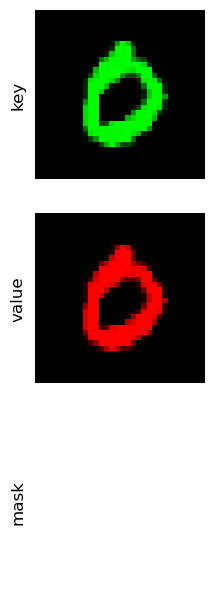

Seed: 0
Editing layer 1
Created ModelWrapperSanturkar model with 33646666 trainable parameters
Restored weights from saved/train/2_Spurious_MNIST-VGG_16/0317_134644/models/model_best.pth
Using passed in data loader for validation.
Performing pre-edit metric calculations on validation set.


100%|███████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 24.78it/s]


Pre-edit metrics: {'TP': array([448, 537, 520, 498, 452, 423, 437, 473, 454, 454]), 'TN': array([8326, 8375, 8215, 7553, 7786, 8244, 8367, 7920, 7888, 8022]), 'FPs': array([244,  40, 303, 987, 782, 414, 225, 602, 688, 519]), 'FNs': array([482, 548, 462, 462, 480, 419, 471, 505, 470, 505]), 'accuracy': 0.4943157894736842, 'per_class_accuracy': array([0.92357895, 0.93810526, 0.91947368, 0.84747368, 0.86715789,
       0.91231579, 0.92673684, 0.88347368, 0.87810526, 0.89221053]), 'per_class_accuracy_mean': 0.8988631578947368, 'precision': array([0.64739884, 0.93067591, 0.63183475, 0.33535354, 0.36628849,
       0.50537634, 0.66012085, 0.44      , 0.39754816, 0.46659815]), 'precision_mean': 0.53811950339605, 'recall': array([0.48172043, 0.49493088, 0.52953157, 0.51875   , 0.48497854,
       0.5023753 , 0.48127753, 0.48364008, 0.49134199, 0.4734098 ]), 'recall_mean': 0.4941956119654501, 'predicted_class_distribution': array([ 692,  577,  823, 1485, 1234,  837,  662, 1075, 1142,  973]), 'f1':

tensor(1.0251, device='cuda:0', grad_fn=<DivBackward0>): 100%|█| 40000/40000 [00:52<00:00, 760.1


Loss (orig, final): 0.43151694536209106 1.025132656097412
L2 norm of weight change: 40.20195007324219
Performing post-edit metric calculations on validation set.


100%|███████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 24.74it/s]

Post-edit metrics: {'TP': array([448, 534, 611, 844, 453,  69, 116,  90, 134,  41]), 'TN': array([8366, 8397, 8112, 4626, 7874, 8606, 8510, 8462, 7867, 8520]), 'FPs': array([ 204,   18,  406, 3914,  694,   52,   82,   60,  709,   21]), 'FNs': array([482, 551, 371, 116, 479, 773, 792, 888, 790, 918]), 'accuracy': 0.35157894736842105, 'per_class_accuracy': array([0.92778947, 0.94010526, 0.91821053, 0.57578947, 0.87652632,
       0.91315789, 0.908     , 0.90021053, 0.84221053, 0.90115789]), 'per_class_accuracy_mean': 0.8703157894736842, 'precision': array([0.68711656, 0.9673913 , 0.60078663, 0.17738546, 0.39494333,
       0.57024793, 0.58585859, 0.6       , 0.15895611, 0.66129032]), 'precision_mean': 0.5403976234059058, 'recall': array([0.48172043, 0.4921659 , 0.62219959, 0.87916667, 0.4860515 ,
       0.08194774, 0.1277533 , 0.09202454, 0.14502165, 0.04275287]), 'recall_mean': 0.34508041901076747, 'predicted_class_distribution': array([ 652,  552, 1017, 4758, 1147,  121,  198,  150,  843

Saved post-edit logits to saved/edit_2_Spurious_MNIST/method_eac/debug/VGG_16-layernum/0321_142034/layernum_1/results/edit_idx_0/models/post_edit_logits.pth
All metrics and KNN results can be found in saved/edit_2_Spurious_MNIST/method_eac/debug/VGG_16-layernum/0321_142034/layernum_1/results/edit_idx_0/models
(0321_144400) Starting Trial 2/3...
saved/edit_2_Spurious_MNIST/method_eac/debug/VGG_16-layernum/0321_142034/layernum_1/results/edit_idx_1
torch.Size([2, 1, 32, 32])
3 2


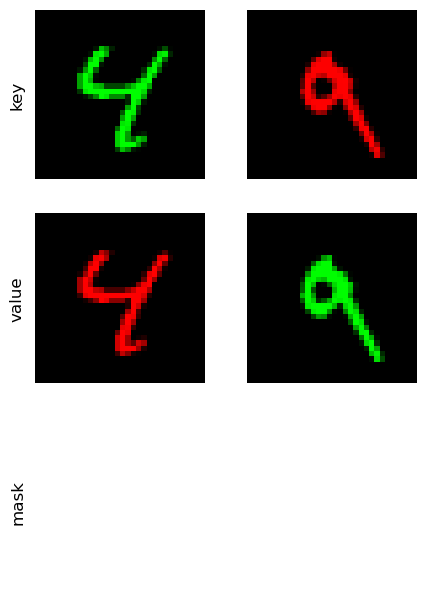

Seed: 0
Editing layer 1
Created ModelWrapperSanturkar model with 33646666 trainable parameters
Restored weights from saved/train/2_Spurious_MNIST-VGG_16/0317_134644/models/model_best.pth
Using passed in data loader for validation.
Performing pre-edit metric calculations on validation set.


100%|███████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 25.62it/s]


Pre-edit metrics: {'TP': array([448, 537, 520, 498, 452, 423, 437, 473, 454, 454]), 'TN': array([8326, 8375, 8215, 7553, 7786, 8244, 8367, 7920, 7888, 8022]), 'FPs': array([244,  40, 303, 987, 782, 414, 225, 602, 688, 519]), 'FNs': array([482, 548, 462, 462, 480, 419, 471, 505, 470, 505]), 'accuracy': 0.4943157894736842, 'per_class_accuracy': array([0.92357895, 0.93810526, 0.91947368, 0.84747368, 0.86715789,
       0.91231579, 0.92673684, 0.88347368, 0.87810526, 0.89221053]), 'per_class_accuracy_mean': 0.8988631578947368, 'precision': array([0.64739884, 0.93067591, 0.63183475, 0.33535354, 0.36628849,
       0.50537634, 0.66012085, 0.44      , 0.39754816, 0.46659815]), 'precision_mean': 0.53811950339605, 'recall': array([0.48172043, 0.49493088, 0.52953157, 0.51875   , 0.48497854,
       0.5023753 , 0.48127753, 0.48364008, 0.49134199, 0.4734098 ]), 'recall_mean': 0.4941956119654501, 'predicted_class_distribution': array([ 692,  577,  823, 1485, 1234,  837,  662, 1075, 1142,  973]), 'f1':

tensor(0.2893, device='cuda:0', grad_fn=<DivBackward0>): 100%|█| 40000/40000 [00:52<00:00, 758.4


Loss (orig, final): 0.3294457793235779 0.2893000543117523
L2 norm of weight change: 40.736671447753906
Performing post-edit metric calculations on validation set.


100%|███████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 25.21it/s]

Post-edit metrics: {'TP': array([408, 464, 477, 496, 442, 416, 432, 468, 452, 448]), 'TN': array([8422, 8412, 8144, 6981, 8128, 8283, 8406, 8037, 7619, 8071]), 'FPs': array([ 148,    3,  374, 1559,  440,  375,  186,  485,  957,  470]), 'FNs': array([522, 621, 505, 464, 490, 426, 476, 510, 472, 511]), 'accuracy': 0.474, 'per_class_accuracy': array([0.92947368, 0.93431579, 0.90747368, 0.78705263, 0.90210526,
       0.91568421, 0.93031579, 0.89526316, 0.84957895, 0.89673684]), 'per_class_accuracy_mean': 0.8947999999999998, 'precision': array([0.73381295, 0.99357602, 0.56051704, 0.24136253, 0.50113379,
       0.52591656, 0.69902913, 0.4910808 , 0.32079489, 0.48801743]), 'precision_mean': 0.5555241127007339, 'recall': array([0.43870968, 0.42764977, 0.48574338, 0.51666667, 0.47424893,
       0.49406176, 0.47577093, 0.47852761, 0.48917749, 0.46715328]), 'recall_mean': 0.4747709485606132, 'predicted_class_distribution': array([ 556,  467,  851, 2055,  882,  791,  618,  953, 1409,  918]), 'f1':

Saved post-edit metrics saved/edit_2_Spurious_MNIST/method_eac/debug/VGG_16-layernum/0321_142034/layernum_1/results/edit_idx_1/models/post_edit_metrics.pth
Saved post-edit logits to saved/edit_2_Spurious_MNIST/method_eac/debug/VGG_16-layernum/0321_142034/layernum_1/results/edit_idx_1/models/post_edit_logits.pth
All metrics and KNN results can be found in saved/edit_2_Spurious_MNIST/method_eac/debug/VGG_16-layernum/0321_142034/layernum_1/results/edit_idx_1/models
(0321_144458) Starting Trial 3/3...
saved/edit_2_Spurious_MNIST/method_eac/debug/VGG_16-layernum/0321_142034/layernum_1/results/edit_idx_2
torch.Size([3, 1, 32, 32])
3 3


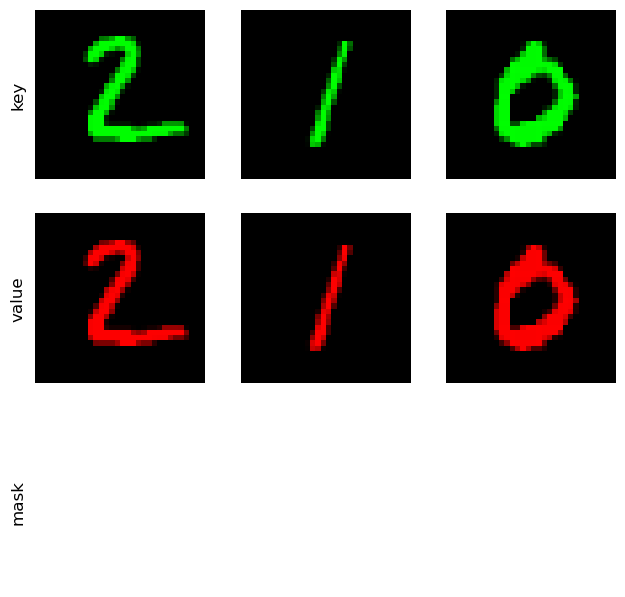

Seed: 0
Editing layer 1
Created ModelWrapperSanturkar model with 33646666 trainable parameters
Restored weights from saved/train/2_Spurious_MNIST-VGG_16/0317_134644/models/model_best.pth
Using passed in data loader for validation.
Performing pre-edit metric calculations on validation set.


100%|███████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 25.11it/s]

Pre-edit metrics: {'TP': array([448, 537, 520, 498, 452, 423, 437, 473, 454, 454]), 'TN': array([8326, 8375, 8215, 7553, 7786, 8244, 8367, 7920, 7888, 8022]), 'FPs': array([244,  40, 303, 987, 782, 414, 225, 602, 688, 519]), 'FNs': array([482, 548, 462, 462, 480, 419, 471, 505, 470, 505]), 'accuracy': 0.4943157894736842, 'per_class_accuracy': array([0.92357895, 0.93810526, 0.91947368, 0.84747368, 0.86715789,
       0.91231579, 0.92673684, 0.88347368, 0.87810526, 0.89221053]), 'per_class_accuracy_mean': 0.8988631578947368, 'precision': array([0.64739884, 0.93067591, 0.63183475, 0.33535354, 0.36628849,
       0.50537634, 0.66012085, 0.44      , 0.39754816, 0.46659815]), 'precision_mean': 0.53811950339605, 'recall': array([0.48172043, 0.49493088, 0.52953157, 0.51875   , 0.48497854,
       0.5023753 , 0.48127753, 0.48364008, 0.49134199, 0.4734098 ]), 'recall_mean': 0.4941956119654501, 'predicted_class_distribution': array([ 692,  577,  823, 1485, 1234,  837,  662, 1075, 1142,  973]), 'f1':

Found precomputed cov matrices, returning...


tensor(0.6366, device='cuda:0', grad_fn=<DivBackward0>):  94%|▉| 37499/40000 [00:49<00:03, 759.5


KeyboardInterrupt: 

In [46]:
iv_path = 'layernum'
iv_values = [i for i in range(1, 13)]
print("Varying {} with following values: {}".format(iv_path, iv_values))

run_experiments(
    iv_path=iv_path,
    iv_values=iv_values,
    edit_data_loader=edit_data_loader,
    progress_report_path=progress_report_path,
    trial_paths_path=trial_paths_path,
    timestamp=timestamp,
    config_dict=config_dict,
    covariance_data_loader=covariance_data_loader,
    test_data_loader=test_data_loader,
    analyze_in_edit=True,
    debug=True,
    seed=0)